# Data Science Capstone

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#import json 

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
dfs = pd.read_html(url)
df = dfs[0]
df.rename(columns={'Neighbourhood' : 'Neighborhood'}, inplace=True)
df_dropna = df[df.Borough != 'Not assigned'].reset_index(drop=True)
df = df_dropna
df

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                          Neighborhood  
0                                            Parkwoods  
1                                     Vic

#### Now the data will be grouped based on borough

In [3]:
df_grouped = df.groupby(['Borough', 'Postal Code'], as_index=False).agg(lambda x:','.join(x))
df_grouped.head()

Borough Postal Code                       Neighborhood
0  Central Toronto         M4N                      Lawrence Park
1  Central Toronto         M4P                   Davisville North
2  Central Toronto         M4R  North Toronto West, Lawrence Park
3  Central Toronto         M4S                         Davisville
4  Central Toronto         M4T        Moore Park, Summerhill East

In [4]:
# Check if we still have any Neighborhoods that are Not Assigned
df_grouped.loc[df_grouped['Borough'].isin(["Not assigned"])]

Empty DataFrame
Columns: [Borough, Postal Code, Neighborhood]
Index: []

In [5]:
# we rearrange the Columns so that the Postal Code appears first

df = df_grouped

df = df[['Postal Code', 'Borough', 'Neighborhood']]
df

Postal Code           Borough  \
0           M4N   Central Toronto   
1           M4P   Central Toronto   
2           M4R   Central Toronto   
3           M4S   Central Toronto   
4           M4T   Central Toronto   
5           M4V   Central Toronto   
6           M5N   Central Toronto   
7           M5P   Central Toronto   
8           M5R   Central Toronto   
9           M4W  Downtown Toronto   
10          M4X  Downtown Toronto   
11          M4Y  Downtown Toronto   
12          M5A  Downtown Toronto   
13          M5B  Downtown Toronto   
14          M5C  Downtown Toronto   
15          M5E  Downtown Toronto   
16          M5G  Downtown Toronto   
17          M5H  Downtown Toronto   
18          M5J  Downtown Toronto   
19          M5K  Downtown Toronto   
20          M5L  Downtown Toronto   
21          M5S  Downtown Toronto   
22          M5T  Downtown Toronto   
23          M5V  Downtown Toronto   
24          M5W  Downtown Toronto   
25          M5X  Downtown Toronto   
26          M6G  Downtown Toronto   
27          M7A  Downtown Toronto   
28          M4E      East Toronto   
29          M4K      East Toronto   
30          M4L      East Toronto   
31          M4M      East Toronto   
32          M7Y      East Toronto   
33          M4B         East York   
34          M4C         East York   
35          M4G         East York   
36          M4H         East York   
37          M4J         East York   
38          M8V         Etobicoke   
39          M8W         Etobicoke   
40          M8X         Etobicoke   
41          M8Y         Etobicoke   
42          M8Z         Etobicoke   
43          M9A         Etobicoke   
44          M9B         Etobicoke   
45          M9C         Etobicoke   
46          M9P         Etobicoke   
47          M9R         Etobicoke   
48          M9V         Etobicoke   
49          M9W         Etobicoke   
50          M7R       Mississauga   
51          M2H        North York   
52          M2J        North York   
53          M2K        North York   
54          M2L        North York   
55          M2M        North York   
56          M2N        North York   
57          M2P        North York   
58          M2R        North York   
59          M3A        North York   
60          M3B        North York   
61          M3C        North York   
62          M3H        North York   
63          M3J        North York   
64          M3K        North York   
65          M3L        North York   
66          M3M        North York   
67          M3N        North York   
68          M4A        North York   
69          M5M        North York   
70          M6A        North York   
71          M6B        North York   
72          M6L        North York   
73          M9L        North York   
74          M9M        North York   
75          M1B       Scarborough   
76          M1C       Scarborough   
77          M1E       Scarborough   
78          M1G       Scarborough   
79          M1H       Scarborough   
80          M1J       Scarborough   
81          M1K       Scarborough   
82          M1L       Scarborough   
83          M1M       Scarborough   
84          M1N       Scarborough   
85          M1P       Scarborough   
86          M1R       Scarborough   
87          M1S       Scarborough   
88          M1T       Scarborough   
89          M1V       Scarborough   
90          M1W       Scarborough   
91          M1X       Scarborough   
92          M6H      West Toronto   
93          M6J      West Toronto   
94          M6K      West Toronto   
95          M6P      West Toronto   
96          M6R      West Toronto   
97          M6S      West Toronto   
98          M6C              York   
99          M6E              York   
100         M6M              York   
101         M6N              York   
102         M9N              York   

                                          Neighborhood  
0                                        Lawrence Park  
1                                     Dav

In [6]:
df.shape

(103, 3)

## Data Frame with their Geographical location

In [7]:
url =  'http://cocl.us/Geospatial_data'

df3 = pd.read_csv(url)
df3

Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
5           M1J  43.744734 -79.239476
6           M1K  43.727929 -79.262029
7           M1L  43.711112 -79.284577
8           M1M  43.716316 -79.239476
9           M1N  43.692657 -79.264848
10          M1P  43.757410 -79.273304
11          M1R  43.750072 -79.295849
12          M1S  43.794200 -79.262029
13          M1T  43.781638 -79.304302
14          M1V  43.815252 -79.284577
15          M1W  43.799525 -79.318389
16          M1X  43.836125 -79.205636
17          M2H  43.803762 -79.363452
18          M2J  43.778517 -79.346556
19          M2K  43.786947 -79.385975
20          M2L  43.757490 -79.374714
21          M2M  43.789053 -79.408493
22          M2N  43.770120 -79.408493
23          M2P  43.752758 -79.400049
24          M2R  43.782736 -79.442259
25          M3A  43.753259 -79.329656
26          M3B  43.745906 -79.352188
27          M3C  43.725900 -79.340923
28          M3H  43.754328 -79.442259
29          M3J  43.767980 -79.487262
30          M3K  43.737473 -79.464763
31          M3L  43.739015 -79.506944
32          M3M  43.728496 -79.495697
33          M3N  43.761631 -79.520999
34          M4A  43.725882 -79.315572
35          M4B  43.706397 -79.309937
36          M4C  43.695344 -79.318389
37          M4E  43.676357 -79.293031
38          M4G  43.709060 -79.363452
39          M4H  43.705369 -79.349372
40          M4J  43.685347 -79.338106
41          M4K  43.679557 -79.352188
42          M4L  43.668999 -79.315572
43          M4M  43.659526 -79.340923
44          M4N  43.728020 -79.388790
45          M4P  43.712751 -79.390197
46          M4R  43.715383 -79.405678
47          M4S  43.704324 -79.388790
48          M4T  43.689574 -79.383160
49          M4V  43.686412 -79.400049
50          M4W  43.679563 -79.377529
51          M4X  43.667967 -79.367675
52          M4Y  43.665860 -79.383160
53          M5A  43.654260 -79.360636
54          M5B  43.657162 -79.378937
55          M5C  43.651494 -79.375418
56          M5E  43.644771 -79.373306
57          M5G  43.657952 -79.387383
58          M5H  43.650571 -79.384568
59          M5J  43.640816 -79.381752
60          M5K  43.647177 -79.381576
61          M5L  43.648198 -79.379817
62          M5M  43.733283 -79.419750
63          M5N  43.711695 -79.416936
64          M5P  43.696948 -79.411307
65          M5R  43.672710 -79.405678
66          M5S  43.662696 -79.400049
67          M5T  43.653206 -79.400049
68          M5V  43.628947 -79.394420
69          M5W  43.646435 -79.374846
70          M5X  43.648429 -79.382280
71          M6A  43.718518 -79.464763
72          M6B  43.709577 -79.445073
73          M6C  43.693781 -79.428191
74          M6E  43.689026 -79.453512
75          M6G  43.669542 -79.422564
76          M6H  43.669005 -79.442259
77          M6J  43.647927 -79.419750
78          M6K  43.636847 -79.428191
79          M6L  43.713756 -79.490074
80          M6M  43.691116 -79.476013
81          M6N  43.673185 -79.487262
82          M6P  43.661608 -79.464763
83          M6R  43.648960 -79.456325
84          M6S  43.651571 -79.484450
85          M7A  43.662301 -79.389494
86          M7R  43.636966 -79.615819
87          M7Y  43.662744 -79.321558
88          M8V  43.605647 -79.501321
89          M8W  43.602414 -79.543484
90          M8X  43.653654 -79.506944
91          M8Y  43.636258 -79.498509
92          M8Z  43.628841 -79.520999
93          M9A  43.667856 -79.532242
94          M9B  43.650943 -79.554724
95          M9C  43.643515 -79.577201
96          M9L  43.756303 -79.565963
97          M9M  43.724766 -79.532242
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

In [8]:
df_merged = pd.merge(df, df3, on ='Postal Code')
df_merged

Postal Code           Borough  \
0           M4N   Central Toronto   
1           M4P   Central Toronto   
2           M4R   Central Toronto   
3           M4S   Central Toronto   
4           M4T   Central Toronto   
5           M4V   Central Toronto   
6           M5N   Central Toronto   
7           M5P   Central Toronto   
8           M5R   Central Toronto   
9           M4W  Downtown Toronto   
10          M4X  Downtown Toronto   
11          M4Y  Downtown Toronto   
12          M5A  Downtown Toronto   
13          M5B  Downtown Toronto   
14          M5C  Downtown Toronto   
15          M5E  Downtown Toronto   
16          M5G  Downtown Toronto   
17          M5H  Downtown Toronto   
18          M5J  Downtown Toronto   
19          M5K  Downtown Toronto   
20          M5L  Downtown Toronto   
21          M5S  Downtown Toronto   
22          M5T  Downtown Toronto   
23          M5V  Downtown Toronto   
24          M5W  Downtown Toronto   
25          M5X  Downtown Toronto   
26          M6G  Downtown Toronto   
27          M7A  Downtown Toronto   
28          M4E      East Toronto   
29          M4K      East Toronto   
30          M4L      East Toronto   
31          M4M      East Toronto   
32          M7Y      East Toronto   
33          M4B         East York   
34          M4C         East York   
35          M4G         East York   
36          M4H         East York   
37          M4J         East York   
38          M8V         Etobicoke   
39          M8W         Etobicoke   
40          M8X         Etobicoke   
41          M8Y         Etobicoke   
42          M8Z         Etobicoke   
43          M9A         Etobicoke   
44          M9B         Etobicoke   
45          M9C         Etobicoke   
46          M9P         Etobicoke   
47          M9R         Etobicoke   
48          M9V         Etobicoke   
49          M9W         Etobicoke   
50          M7R       Mississauga   
51          M2H        North York   
52          M2J        North York   
53          M2K        North York   
54          M2L        North York   
55          M2M        North York   
56          M2N        North York   
57          M2P        North York   
58          M2R        North York   
59          M3A        North York   
60          M3B        North York   
61          M3C        North York   
62          M3H        North York   
63          M3J        North York   
64          M3K        North York   
65          M3L        North York   
66          M3M        North York   
67          M3N        North York   
68          M4A        North York   
69          M5M        North York   
70          M6A        North York   
71          M6B        North York   
72          M6L        North York   
73          M9L        North York   
74          M9M        North York   
75          M1B       Scarborough   
76          M1C       Scarborough   
77          M1E       Scarborough   
78          M1G       Scarborough   
79          M1H       Scarborough   
80          M1J       Scarborough   
81          M1K       Scarborough   
82          M1L       Scarborough   
83          M1M       Scarborough   
84          M1N       Scarborough   
85          M1P       Scarborough   
86          M1R       Scarborough   
87          M1S       Scarborough   
88          M1T       Scarborough   
89          M1V       Scarborough   
90          M1W       Scarborough   
91          M1X       Scarborough   
92          M6H      West Toronto   
93          M6J      West Toronto   
94          M6K      West Toronto   
95          M6P      West Toronto   
96          M6R      West Toronto   
97          M6S      West Toronto   
98          M6C              York   
99          M6E              York   
100         M6M              York   
101         M6N              York   
102         M9N              York   

                                          Neighborhood   Latitude  Longitude  
0                                        Lawrence Park  43.728020 -79.388790

In [9]:
# lets find out how many neighborhoods in each borough
df_merged.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighborhood, dtype: int64

#### Now, lets find all the Neighborhood that has Toronto in it

In [10]:
df_toronto = df_merged
df_toronto.head()

Postal Code          Borough                       Neighborhood   Latitude  \
0         M4N  Central Toronto                      Lawrence Park  43.728020   
1         M4P  Central Toronto                   Davisville North  43.712751   
2         M4R  Central Toronto  North Toronto West, Lawrence Park  43.715383   
3         M4S  Central Toronto                         Davisville  43.704324   
4         M4T  Central Toronto        Moore Park, Summerhill East  43.689574   

   Longitude  
0 -79.388790  
1 -79.390197  
2 -79.405678  
3 -79.388790  
4 -79.383160

##### Now let me install folium map

In [11]:
!pip install folium==0.5  # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

print('Folium installed and imported!')

     |████████████████████████████████| 79 kB 7.8 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=bfbb63b3ae941517b6c52b4cb1860b56806cac1be66657183a38766afe729922
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed and imported!


In [12]:
#Create list with the Boroughs (to be used later)
boroughs = df_toronto['Borough'].unique().tolist()

In [13]:
#Obtain the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
lat_toronto = df_toronto['Latitude'].mean()
long_toronto = df_toronto['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, long_toronto))

The geographical coordinates of Toronto are 43.704607733980595, -79.3971529116505


In [14]:
# This will color categorize each borough
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

In [15]:
import folium

# create map of Downtown Toronto using latitude and longitude values

map_toronto = folium.Map(location=[lat_toronto, long_toronto], zoom_start=10.5)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], 
                                           df_toronto['Longitude'],
                                           df_toronto['Borough'], 
                                           df_toronto['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill_color=borough_color[borough],
        fill_opacity=0.8).add_to(map_toronto)  
    
map_toronto


#### At this point, we will define our foursquare credentials

In [16]:
CLIENT_ID = '2IZ2ULWM0QDNJYPGMYOKPMETVPDBU4UNLWCQWNKBA15YGL0F' # your Foursquare ID
CLIENT_SECRET = '031BF5BUARDVLORIJWLZO0DZIAFVXV1YLWEAG3IABD3RNQUS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2IZ2ULWM0QDNJYPGMYOKPMETVPDBU4UNLWCQWNKBA15YGL0F
CLIENT_SECRET:031BF5BUARDVLORIJWLZO0DZIAFVXV1YLWEAG3IABD3RNQUS


#### Now, let's get the top 100 venues that are in Lawrence Park within a radius of 500 meters.
###### First, let's create the GET request URL

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
#Get venues for all neighborhoods in our dataset
Toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government
The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter 

In [19]:
print(Toronto_venues.shape)
Toronto_venues.head()

(2120, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     Lawrence Park              43.728020              -79.388790   
1     Lawrence Park              43.728020              -79.388790   
2     Lawrence Park              43.728020              -79.388790   
3     Lawrence Park              43.728020              -79.388790   
4  Davisville North              43.712751              -79.390197   

                            Venue  Venue Latitude  Venue Longitude  \
0            Lawrence Park Ravine       43.726963       -79.394382   
1                  Dim Sum Deluxe       43.726953       -79.394260   
2              Zodiac Swim School       43.728532       -79.382860   
3  TTC Bus #162 - Lawrence-Donway       43.728026       -79.382805   
4         Summerhill Market North       43.715499       -79.392881   

       Venue Category  
0                Park  
1  Dim Sum Restaurant  
2         Swim School  
3            Bus Line  
4   Food & Drink Shop

In [20]:
Toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                               4   
Alderwood, Long Branch                                                  7   
Bathurst Manor, Wilson Heights, Downsview North                        21   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      21   
Berczy Park                                                            59   
Birch Cliff, Cliffside West                                             4   
Brockton, Parkdale Village, Exhibition Place                           23   
Business reply mail Processing Centre, South Ce...                     16   
CN Tower, King and Spadina, Railway Lands, Harb...                     17   
Caledonia-Fairbanks                                                     4   
Canada Post Gateway Processing Centre                                  14   
Cedarbrae                                                               9   
Central Bay Street                                                     61   
Christie                                                               16   
Church and Wellesley                                                   78   
Clarks Corners, Tam O'Shanter, Sullivan                                14   
Cliffside, Cliffcrest, Scarborough Village West                         2   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             33   
Davisville North                                                        7   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        4   
Don Mills                                                              27   
Dorset Park, Wexford Heights, Scarborough Town ...                      6   
Downsview                                                              15   
Dufferin, Dovercourt Village                                           14   
East Toronto, Broadview North (Old East York)                           3   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      9   
Fairview, Henry Farm, Oriole                                           69   
First Canadian Place, Underground city                                100   
Forest Hill North & West, Forest Hill Road Park                         5   
Garden District, Ryerson                                              100   
Glencairn                                                               4   
Golden Mile, Clairlea, Oakridge                                        10   
Guildwood, Morningside, West Hill                                       8   
Harbourfront East, Union Station, Toronto Islands                     100   
High Park, The Junction South                                          25   
Hillcrest Village                                                       5   
Humber Summit                                                           2   
Humberlea, Emery                                                        2   
Humewood-Cedarvale                                                      4   
India Bazaar, The Beaches West                                         20   
Kennedy Park, Ionview, East Birchmount Park                             4   
Kensington Market, Chinatown, Grange Park                              66   
Kingsview Village, St. Phillips, Martin Grove G...                      4   
Lawrence Manor, Lawrence Heights                                       11   
Lawrence Park                                                           4   
Leaside                                                                31   
Little Portugal, Trinity                                               43   
Malvern, Rouge                                                          1   
Milliken, Agincourt North, Steeles East, L'Amor.

In [21]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

print("The Venue Categories are", Toronto_venues['Venue Category'].unique())

"Movie Theater" in Toronto_venues['Venue Category'].unique()

There are 267 uniques categories.
The Venue Categories are ['Park' 'Dim Sum Restaurant' 'Swim School' 'Bus Line' 'Food & Drink Shop'
 'Breakfast Spot' 'Department Store' 'Hotel' 'Sandwich Place'
 'Pizza Place' 'Yoga Studio' 'Salon / Barbershop' 'Restaurant'
 'Mexican Restaurant' 'Spa' 'Clothing Store' 'Diner' 'Chinese Restaurant'
 'Coffee Shop' 'Fast Food Restaurant' 'Sporting Goods Shop' 'Café'
 'Italian Restaurant' 'Ice Cream Shop' 'Cosmetics Shop'
 'Gym / Fitness Center' 'Dessert Shop' 'Indian Restaurant'
 'Seafood Restaurant' 'Sushi Restaurant' 'Thai Restaurant' 'Gym'
 'Toy / Game Store' 'Brewery' 'Greek Restaurant' 'Gas Station'
 'Farmers Market' 'Gourmet Shop' 'Pharmacy' 'Discount Store' 'Trail'
 'Tennis Court' 'Supermarket' 'Liquor Store' 'American Restaurant' 'Pub'
 'Fried Chicken Joint' 'Vietnamese Restaurant' 'Bank' 'Light Rail Station'
 'Bagel Shop' 'Home Service' 'Garden' 'Jewelry Store' 'Burger Joint'
 'BBQ Joint' 'History Museum' 'Middle Eastern Restaurant' 'Donut Shop'
 

True

In [22]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhoods'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

print(Toronto_onehot.shape)
Toronto_onehot.head()

(2120, 268)


Neighborhoods  Accessories Store  Airport  Airport Food Court  \
0     Lawrence Park                  0        0                   0   
1     Lawrence Park                  0        0                   0   
2     Lawrence Park                  0        0                   0   
3     Lawrence Park                  0        0                   0   
4  Davisville North                  0        0                   0   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0             0               0                0                 0   
1             0               0                0                 0   
2             0               0                0                 0   
3             0               0                0                 0   
4             0               0                0                 0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  Art Museum  \
0                    0             0         0            0           0   
1                    0             0         0            0           0   
2                    0             0         0            0           0   
3                    0             0         0            0           0   
4                    0             0         0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                    0                 0                   0            0   
1                    0                 0                   0            0   
2                    0                 0                   0            0   
3                    0                 0                   0            0   
4                    0                 0                   0            0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0              0          0           0           0       0     0    0   
1              0          0           0           0       0     0    0   
2              0          0           0           0       0     0    0   
3              0          0           0           0       0     0    0   
4              0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Stadium  Beach  \
0               0                 0                   0      0   
1               0                 0                   0      0   
2               0                 0                   0      0   
3               0                 0                   0      0   
4               0                 0                   0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
0                0         0           0                   0          0   
1                0         0           0                   0          0   
2                0         0           0                   0          0   
3                0         0           0                   0          0   
4                0         0           0                   0          0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0       0           0              0          0         0   
1       0           0              0          0         0   
2       0           0              0          0         0   
3       0           0              0          0         0   
4       0           0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0                0         0             0              0         0   
1                0         0             0         

In [23]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhoods').mean().reset_index()
print(Toronto_grouped.shape)
Toronto_grouped.head()

(96, 268)


Neighborhoods  Accessories Store  \
0                                        Agincourt                0.0   
1                           Alderwood, Long Branch                0.0   
2  Bathurst Manor, Wilson Heights, Downsview North                0.0   
3                                  Bayview Village                0.0   
4                Bedford Park, Lawrence Manor East                0.0   

   Airport  Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0      0.0                 0.0           0.0             0.0              0.0   
1      0.0                 0.0           0.0             0.0              0.0   
2      0.0                 0.0           0.0             0.0              0.0   
3      0.0                 0.0           0.0             0.0              0.0   
4      0.0                 0.0           0.0             0.0              0.0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0               0.0             0.000000           0.0       0.0          0.0   
1               0.0             0.000000           0.0       0.0          0.0   
2               0.0             0.000000           0.0       0.0          0.0   
3               0.0             0.000000           0.0       0.0          0.0   
4               0.0             0.047619           0.0       0.0          0.0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0         0.0                  0.0               0.0                 0.0   
1         0.0                  0.0               0.0                 0.0   
2         0.0                  0.0               0.0                 0.0   
3         0.0                  0.0               0.0                 0.0   
4         0.0                  0.0               0.0                 0.0   

   Auto Garage  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0          0.0            0.0        0.0         0.0         0.0     0.0   
1          0.0            0.0        0.0         0.0         0.0     0.0   
2          0.0            0.0        0.0         0.0         0.0     0.0   
3          0.0            0.0        0.0         0.0         0.0     0.0   
4          0.0            0.0        0.0         0.0         0.0     0.0   

       Bank  Bar  Baseball Field  Baseball Stadium  Basketball Stadium  Beach  \
0  0.000000  0.0             0.0               0.0                 0.0    0.0   
1  0.000000  0.0             0.0               0.0                 0.0    0.0   
2  0.095238  0.0             0.0               0.0                 0.0    0.0   
3  0.250000  0.0             0.0               0.0                 0.0    0.0   
4  0.000000  0.0             0.0               0.0                 0.0    0.0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
0              0.0       0.0         0.0                 0.0        0.0   
1              0.0       0.0         0.0                 0.0        0.0   
2              0.0       0.0         0.0                 0.0        0.0   
3              0.0       0.0         0.0                 0.0        0.0   
4              0.0       0.0         0.0                 0.0        0.0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0     0.0         0.0            0.0        0.0       0.0   
1     0.0         0.0            0.0        0.0       0.0   
2     0.0         0.0            0.0        0.0       0.0   
3     0.0         0.0            0.0        0.0       0.0   
4     0.0         0.0            0.0        0.0       0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                   0.0            0.25      0.0     0.000000   
1                   0.0            0.00      0.0     0.000000   
2                   0.0            0.00      0.0     0.047619   
3                   0.0            0.00      0.0     0.000000   
4                   0.0            0.00      0.0     0.000000   

   Bubble Tea 

In [24]:
the = Toronto_grouped[["Neighborhoods","Movie Theater"]]
the.head() #.head() shows the first five rows only

Neighborhoods  Movie Theater
0                                        Agincourt            0.0
1                           Alderwood, Long Branch            0.0
2  Bathurst Manor, Wilson Heights, Downsview North            0.0
3                                  Bayview Village            0.0
4                Bedford Park, Lawrence Manor East            0.0

In [25]:
the = the.rename(columns={'Neighborhoods':'Neighborhood'})

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = the.drop(['Neighborhood'], axis=1)

kmeans.fit(X)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [27]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [28]:
scores = [get_inertia(x) for x in range(2, 21)]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python

Text(0, 0.5, 'Error')

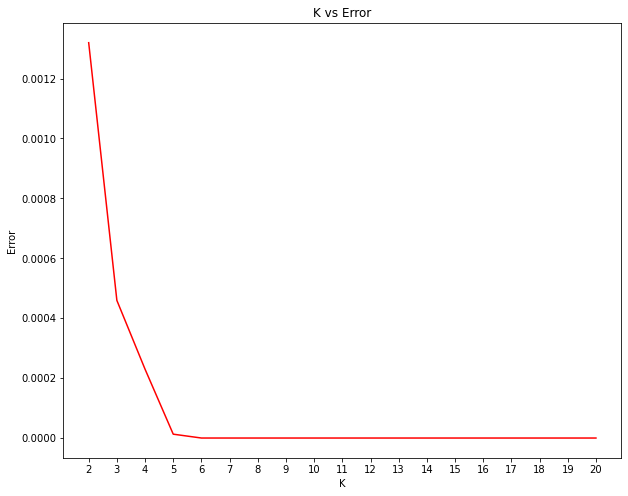

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors


plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

In [30]:
#from yellowbrick.cluster import KElbowVisualizer

#model = KMeans()
#visualizer = KElbowVisualizer(model, k=(2,21))

#visualizer.fit(X)        # Fit the data to the visualizer
#visualizer.show()

In [31]:
kclusters = 4

Toronto_clustering = the.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0)
kmeans.fit(Toronto_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [32]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = the.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

to_merged.head()

Neighborhood  Movie Theater  \
0                                        Agincourt            0.0   
1                           Alderwood, Long Branch            0.0   
2  Bathurst Manor, Wilson Heights, Downsview North            0.0   
3                                  Bayview Village            0.0   
4                Bedford Park, Lawrence Manor East            0.0   

   Cluster Labels  
0               0  
1               0  
2               0  
3               0  
4               0

In [33]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(Toronto_venues.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(2120, 9)


Neighborhood  Movie Theater  Cluster Labels  \
0               Agincourt            0.0               0   
0               Agincourt            0.0               0   
0               Agincourt            0.0               0   
0               Agincourt            0.0               0   
1  Alderwood, Long Branch            0.0               0   

   Neighborhood Latitude  Neighborhood Longitude  \
0              43.794200              -79.262029   
0              43.794200              -79.262029   
0              43.794200              -79.262029   
0              43.794200              -79.262029   
1              43.602414              -79.543484   

                              Venue  Venue Latitude  Venue Longitude  \
0       Panagio's Breakfast & Lunch       43.792370       -79.260203   
0                     El Pulgarcito       43.792648       -79.259208   
0                          Twilight       43.791999       -79.258584   
0  Royal Chinese Seafood Restaurant       43.798496       -79.262196   
1  Il Paesano Pizzeria & Restaurant       43.601280       -79.545028   

              Venue Category  
0             Breakfast Spot  
0  Latin American Restaurant  
0                     Lounge  
0         Chinese Restaurant  
1                Pizza Place

In [34]:
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(2120, 9)


Neighborhood  Movie Theater  \
0                                           Agincourt       0.000000   
63                          Regent Park, Harbourfront       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
63                          Regent Park, Harbourfront       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
62        Queen's Park, Ontario Provincial Government       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63                          Regent Park, Harbourfront       0.000000   
63       

In [35]:
to_merged['Venue Category'].value_counts()['Movie Theater']

6

###### We now see that there are a total of 6 locations with Movie Theaters in Toronto
###### We will create a new dataframe with the Neighborhood and Movie Theaters

In [36]:
# create map
map_clusters = folium.Map(location=[lat_toronto, long_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [37]:
# How many Neighborhood per cluster

the["Cluster Labels"] = kmeans.labels_
the.head()

Neighborhood  Movie Theater  \
0                                        Agincourt            0.0   
1                           Alderwood, Long Branch            0.0   
2  Bathurst Manor, Wilson Heights, Downsview North            0.0   
3                                  Bayview Village            0.0   
4                Bedford Park, Lawrence Manor East            0.0   

   Cluster Labels  
0               0  
1               0  
2               0  
3               0  
4               0

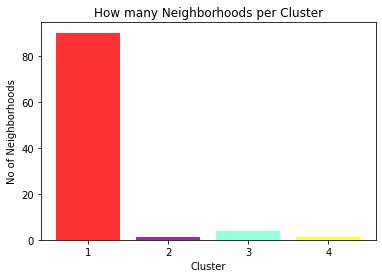

In [38]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
colors = ['red', 'purple','aquamarine', 'yellow']
performance = the['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color= colors)
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show() #darkkhaki

In [39]:
# How many neighborhoods in each cluster
the['Cluster Labels'].value_counts()

0    90
2     4
3     1
1     1
Name: Cluster Labels, dtype: int64

## Analysis of each Cluster

##### Cluster 1

In [40]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df[['Borough', 'Neighborhood']]
df_new.head()

Borough                       Neighborhood
0  Central Toronto                      Lawrence Park
1  Central Toronto                   Davisville North
2  Central Toronto  North Toronto West, Lawrence Park
3  Central Toronto                         Davisville
4  Central Toronto        Moore Park, Summerhill East

In [41]:
# Red 

cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_new, cluster1, on='Neighborhood')
df_cluster1


Borough                                       Neighborhood  \
0      Central Toronto                                      Lawrence Park   
1      Central Toronto                                      Lawrence Park   
2      Central Toronto                                      Lawrence Park   
3      Central Toronto                                      Lawrence Park   
4      Central Toronto                                   Davisville North   
5      Central Toronto                                   Davisville North   
6      Central Toronto                                   Davisville North   
7      Central Toronto                                   Davisville North   
8      Central Toronto                                   Davisville North   
9      Central Toronto                                   Davisville North   
10     Central Toronto                                   Davisville North   
11     Central Toronto                  North Toronto West, Lawrence Park   
12     Central Toronto                  North Toronto West, Lawrence Park   
13     Central Toronto                  North Toronto West, Lawrence Park   
14     Central Toronto                  North Toronto West, Lawrence Park   
15     Central Toronto                  North Toronto West, Lawrence Park   
16     Central Toronto                  North Toronto West, Lawrence Park   
17     Central Toronto                  North Toronto West, Lawrence Park   
18     Central Toronto                  North Toronto West, Lawrence Park   
19     Central Toronto                  North Toronto West, Lawrence Park   
20     Central Toronto                  North Toronto West, Lawrence Park   
21     Central Toronto                  North Toronto West, Lawrence Park   
22     Central Toronto                  North Toronto West, Lawrence Park   
23     Central Toronto                  North Toronto West, Lawrence Park   
24     Central Toronto                  North Toronto West, Lawrence Park   
25     Central Toronto                  North Toronto West, Lawrence Park   
26     Central Toronto                  North Toronto West, Lawrence Park   
27     Central Toronto                  North Toronto West, Lawrence Park   
28     Central Toronto                  North Toronto West, Lawrence Park   
29     Central Toronto                  North Toronto West, Lawrence Park   
30     Central Toronto                  North Toronto West, Lawrence Park   
31     Central Toronto                                         Davisville   
32     Central Toronto                                         Davisville   
33     Central Toronto                                         Davisville   
34     Central Toronto                                         Davisville   
35     Central Toronto                                         Davisville   
36     Central Toronto                                         Davisville   
37     Central Toronto                                         Davisville   
38     Central Toronto                                         Davisville   
39     Central Toronto                                         Davisville   
40     Central Toronto                                         Davisville   
41     Central Toronto                                         Davisville   
42     Central Toronto                                         Davisville   
43     Central Toronto                                         Davisville   
44     Central Toronto                                         Davisville   
45     Central Toronto                                         Davisville   
46     Central Toronto                                         Davisville   
47     Central Toronto                                         Davisville   
48     Central Toronto                                         Davisville   
49     Central Toronto                                         Davisville   
50     Central Toronto                                         Davisville   
51     Cent

In [56]:
df_cluster1['Venue Category'].value_counts()

Coffee Shop                      156
Café                              86
Park                              54
Restaurant                        53
Pizza Place                       41
Italian Restaurant                39
Grocery Store                     36
Hotel                             35
Sandwich Place                    35
Japanese Restaurant               34
Bakery                            34
Gym                               30
Sushi Restaurant                  28
American Restaurant               24
Bank                              24
Bar                               23
Fast Food Restaurant              21
Pharmacy                          20
Thai Restaurant                   20
Pub                               20
Breakfast Spot                    19
Seafood Restaurant                19
Gastropub                         17
Clothing Store                    17
Discount Store                    16
Fried Chicken Joint               15
Vegetarian / Vegan Restaurant     15
D

In [57]:
df_cluster1.sort_values(["Movie Theater"], ascending=False)

Borough                                       Neighborhood  \
0      Central Toronto                                      Lawrence Park   
1233      East Toronto  Business reply mail Processing Centre, South C...   
1245         East York                    Parkview Hill, Woodbine Gardens   
1244         East York                    Parkview Hill, Woodbine Gardens   
1243         East York                    Parkview Hill, Woodbine Gardens   
1242         East York                    Parkview Hill, Woodbine Gardens   
1241         East York                    Parkview Hill, Woodbine Gardens   
1240         East York                    Parkview Hill, Woodbine Gardens   
1239         East York                    Parkview Hill, Woodbine Gardens   
1238         East York                    Parkview Hill, Woodbine Gardens   
1237         East York                    Parkview Hill, Woodbine Gardens   
1236      East Toronto  Business reply mail Processing Centre, South C...   
1235      East Toronto  Business reply mail Processing Centre, South C...   
1234      East Toronto  Business reply mail Processing Centre, South C...   
1232      East Toronto  Business reply mail Processing Centre, South C...   
1      Central Toronto                                      Lawrence Park   
1231      East Toronto  Business reply mail Processing Centre, South C...   
1230      East Toronto  Business reply mail Processing Centre, South C...   
1229      East Toronto  Business reply mail Processing Centre, South C...   
1228      East Toronto  Business reply mail Processing Centre, South C...   
1227      East Toronto  Business reply mail Processing Centre, South C...   
1226      East Toronto  Business reply mail Processing Centre, South C...   
1225      East Toronto  Business reply mail Processing Centre, South C...   
1224      East Toronto  Business reply mail Processing Centre, South C...   
1223      East Toronto  Business reply mail Processing Centre, South C...   
1222      East Toronto  Business reply mail Processing Centre, South C...   
1221      East Toronto  Business reply mail Processing Centre, South C...   
1220      East Toronto                                    Studio District   
1246         East York                    Parkview Hill, Woodbine Gardens   
1247         East York                    Parkview Hill, Woodbine Gardens   
1248         East York                                   Woodbine Heights   
1249         East York                                   Woodbine Heights   
1274         East York                                            Leaside   
1273         East York                                            Leaside   
1272         East York                                            Leaside   
1271         East York                                            Leaside   
1270         East York                                            Leaside   
1269         East York                                            Leaside   
1268         East York                                            Leaside   
1267         East York                                            Leaside   
1266         East York                                            Leaside   
1265         East York                                            Leaside   
1264         East York                                            Leaside   
1263         East York                                            Leaside   
1262         East York                                            Leaside   
1261         East York                                            Leaside   
1260         East York                                            Leaside   
1259         East York                                            Leaside   
1258         East York                                            Leaside   
1257         East York                                            Leaside   
1256         East York                                            Leaside   
1255       

In [58]:
#df_cluster1['Venue Category'].value_counts(ascending=False)['Movie Theatre']

##### Cluster 2

In [59]:
# Purple 
cluster2=to_merged.loc[to_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_new, cluster2, on='Neighborhood')

In [60]:
df_cluster2

Borough            Neighborhood  Movie Theater  Cluster Labels  \
0   West Toronto  Parkdale, Roncesvalles       0.071429               1   
1   West Toronto  Parkdale, Roncesvalles       0.071429               1   
2   West Toronto  Parkdale, Roncesvalles       0.071429               1   
3   West Toronto  Parkdale, Roncesvalles       0.071429               1   
4   West Toronto  Parkdale, Roncesvalles       0.071429               1   
5   West Toronto  Parkdale, Roncesvalles       0.071429               1   
6   West Toronto  Parkdale, Roncesvalles       0.071429               1   
7   West Toronto  Parkdale, Roncesvalles       0.071429               1   
8   West Toronto  Parkdale, Roncesvalles       0.071429               1   
9   West Toronto  Parkdale, Roncesvalles       0.071429               1   
10  West Toronto  Parkdale, Roncesvalles       0.071429               1   
11  West Toronto  Parkdale, Roncesvalles       0.071429               1   
12  West Toronto  Parkdale, Roncesvalles       0.071429               1   
13  West Toronto  Parkdale, Roncesvalles       0.071429               1   

    Neighborhood Latitude  Neighborhood Longitude  \
0                43.64896              -79.456325   
1                43.64896              -79.456325   
2                43.64896              -79.456325   
3                43.64896              -79.456325   
4                43.64896              -79.456325   
5                43.64896              -79.456325   
6                43.64896              -79.456325   
7                43.64896              -79.456325   
8                43.64896              -79.456325   
9                43.64896              -79.456325   
10               43.64896              -79.456325   
11               43.64896              -79.456325   
12               43.64896              -79.456325   
13               43.64896              -79.456325   

                             Venue  Venue Latitude  Venue Longitude  \
0                  Butler's Pantry       43.650087       -79.450458   
1     The Local Pub and Restaurant       43.651017       -79.450911   
2                 The Chocolateria       43.649928       -79.450437   
3   Offleash Dog Trail - High Park       43.645485       -79.458747   
4     Domani Restaurant & Wine Bar       43.649235       -79.450229   
5                            Scout       43.650970       -79.450866   
6                   Likely General       43.650622       -79.450635   
7                      A Good Read       43.649470       -79.450339   
8        Reunion Island Coffee Bar       43.650463       -79.450610   
9                      Cider House       43.650688       -79.450685   
10                     Inter Steer       43.649796       -79.450310   
11                    Revue Cinema       43.651112       -79.450961   
12                       La Cubana       43.650912       -79.450909   
13                      Aris Grill       43.650091       -79.450396   

                 Venue Category  
0                Breakfast Spot  
1                           Bar  
2                  Dessert Shop  
3                       Dog Run  
4            Italian Restaurant  
5                     Gift Shop  
6                     Gift Shop  
7                     Bookstore  
8                   Coffee Shop  
9                    Restaurant  
10  Eastern European Restaurant  
11                Movie Theater  
12             Cuban Restaurant  
13               Breakfast Spot

In [61]:
df_cluster2.sort_values(["Movie Theater"], ascending=False)

Borough            Neighborhood  Movie Theater  Cluster Labels  \
0   West Toronto  Parkdale, Roncesvalles       0.071429               1   
1   West Toronto  Parkdale, Roncesvalles       0.071429               1   
2   West Toronto  Parkdale, Roncesvalles       0.071429               1   
3   West Toronto  Parkdale, Roncesvalles       0.071429               1   
4   West Toronto  Parkdale, Roncesvalles       0.071429               1   
5   West Toronto  Parkdale, Roncesvalles       0.071429               1   
6   West Toronto  Parkdale, Roncesvalles       0.071429               1   
7   West Toronto  Parkdale, Roncesvalles       0.071429               1   
8   West Toronto  Parkdale, Roncesvalles       0.071429               1   
9   West Toronto  Parkdale, Roncesvalles       0.071429               1   
10  West Toronto  Parkdale, Roncesvalles       0.071429               1   
11  West Toronto  Parkdale, Roncesvalles       0.071429               1   
12  West Toronto  Parkdale, Roncesvalles       0.071429               1   
13  West Toronto  Parkdale, Roncesvalles       0.071429               1   

    Neighborhood Latitude  Neighborhood Longitude  \
0                43.64896              -79.456325   
1                43.64896              -79.456325   
2                43.64896              -79.456325   
3                43.64896              -79.456325   
4                43.64896              -79.456325   
5                43.64896              -79.456325   
6                43.64896              -79.456325   
7                43.64896              -79.456325   
8                43.64896              -79.456325   
9                43.64896              -79.456325   
10               43.64896              -79.456325   
11               43.64896              -79.456325   
12               43.64896              -79.456325   
13               43.64896              -79.456325   

                             Venue  Venue Latitude  Venue Longitude  \
0                  Butler's Pantry       43.650087       -79.450458   
1     The Local Pub and Restaurant       43.651017       -79.450911   
2                 The Chocolateria       43.649928       -79.450437   
3   Offleash Dog Trail - High Park       43.645485       -79.458747   
4     Domani Restaurant & Wine Bar       43.649235       -79.450229   
5                            Scout       43.650970       -79.450866   
6                   Likely General       43.650622       -79.450635   
7                      A Good Read       43.649470       -79.450339   
8        Reunion Island Coffee Bar       43.650463       -79.450610   
9                      Cider House       43.650688       -79.450685   
10                     Inter Steer       43.649796       -79.450310   
11                    Revue Cinema       43.651112       -79.450961   
12                       La Cubana       43.650912       -79.450909   
13                      Aris Grill       43.650091       -79.450396   

                 Venue Category  
0                Breakfast Spot  
1                           Bar  
2                  Dessert Shop  
3                       Dog Run  
4            Italian Restaurant  
5                     Gift Shop  
6                     Gift Shop  
7                     Bookstore  
8                   Coffee Shop  
9                    Restaurant  
10  Eastern European Restaurant  
11                Movie Theater  
12             Cuban Restaurant  
13               Breakfast Spot

In [64]:
df_cluster2['Venue Category'].unique()

array(['Breakfast Spot', 'Bar', 'Dessert Shop', 'Dog Run',
       'Italian Restaurant', 'Gift Shop', 'Bookstore', 'Coffee Shop',
       'Restaurant', 'Eastern European Restaurant', 'Movie Theater',
       'Cuban Restaurant'], dtype=object)

In [67]:
df_cluster2['Venue Category'].value_counts(ascending=False)['Movie Theater']

1

##### Cluster 3

In [68]:
# Turquoise
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_new, cluster3, on='Neighborhood')
df_cluster3

Borough                  Neighborhood  Movie Theater  \
0    Downtown Toronto      Garden District, Ryerson       0.010000   
1    Downtown Toronto      Garden District, Ryerson       0.010000   
2    Downtown Toronto      Garden District, Ryerson       0.010000   
3    Downtown Toronto      Garden District, Ryerson       0.010000   
4    Downtown Toronto      Garden District, Ryerson       0.010000   
5    Downtown Toronto      Garden District, Ryerson       0.010000   
6    Downtown Toronto      Garden District, Ryerson       0.010000   
7    Downtown Toronto      Garden District, Ryerson       0.010000   
8    Downtown Toronto      Garden District, Ryerson       0.010000   
9    Downtown Toronto      Garden District, Ryerson       0.010000   
10   Downtown Toronto      Garden District, Ryerson       0.010000   
11   Downtown Toronto      Garden District, Ryerson       0.010000   
12   Downtown Toronto      Garden District, Ryerson       0.010000   
13   Downtown Toronto      Garden District, Ryerson       0.010000   
14   Downtown Toronto      Garden District, Ryerson       0.010000   
15   Downtown Toronto      Garden District, Ryerson       0.010000   
16   Downtown Toronto      Garden District, Ryerson       0.010000   
17   Downtown Toronto      Garden District, Ryerson       0.010000   
18   Downtown Toronto      Garden District, Ryerson       0.010000   
19   Downtown Toronto      Garden District, Ryerson       0.010000   
20   Downtown Toronto      Garden District, Ryerson       0.010000   
21   Downtown Toronto      Garden District, Ryerson       0.010000   
22   Downtown Toronto      Garden District, Ryerson       0.010000   
23   Downtown Toronto      Garden District, Ryerson       0.010000   
24   Downtown Toronto      Garden District, Ryerson       0.010000   
25   Downtown Toronto      Garden District, Ryerson       0.010000   
26   Downtown Toronto      Garden District, Ryerson       0.010000   
27   Downtown Toronto      Garden District, Ryerson       0.010000   
28   Downtown Toronto      Garden District, Ryerson       0.010000   
29   Downtown Toronto      Garden District, Ryerson       0.010000   
30   Downtown Toronto      Garden District, Ryerson       0.010000   
31   Downtown Toronto      Garden District, Ryerson       0.010000   
32   Downtown Toronto      Garden District, Ryerson       0.010000   
33   Downtown Toronto      Garden District, Ryerson       0.010000   
34   Downtown Toronto      Garden District, Ryerson       0.010000   
35   Downtown Toronto      Garden District, Ryerson       0.010000   
36   Downtown Toronto      Garden District, Ryerson       0.010000   
37   Downtown Toronto      Garden District, Ryerson       0.010000   
38   Downtown Toronto      Garden District, Ryerson       0.010000   
39   Downtown Toronto      Garden District, Ryerson       0.010000   
40   Downtown Toronto      Garden District, Ryerson       0.010000   
41   Downtown Toronto      Garden District, Ryerson       0.010000   
42   Downtown Toronto      Garden District, Ryerson       0.010000   
43   Downtown Toronto      Garden District, Ryerson       0.010000   
44   Downtown Toronto      Garden District, Ryerson       0.010000   
45   Downtown Toronto      Garden District, Ryerson       0.010000   
46   Downtown Toronto      Garden District, Ryerson       0.010000   
47   Downtown Toronto      Garden District, Ryerson       0.010000   
48   Downtown Toronto      Garden District, Ryerson       0.010000   
49   Downtown Toronto      Garden District, Ryerson       0.010000   
50   Downtown Toronto      Garden District, Ryerson       0.010000   
51   Downtown Toronto      Garden District, Ryerson       0.010000   
52   Downtown Toronto      Garden District, Ryerson       0.010000   
53   Downtown Toronto      Garden District, Ryerson       0.010000   
54   Downtown Toronto      Garden District, Ryerson       0.010000   
55   Downtown Toronto      Garden District, Ryerson       0.010000   
56   Downtown Toronto   

In [69]:
df_cluster3.sort_values(["Movie Theater"], ascending=False)

Borough                  Neighborhood  Movie Theater  \
301        North York   Willowdale, Willowdale East       0.028571   
284        North York   Willowdale, Willowdale East       0.028571   
282        North York   Willowdale, Willowdale East       0.028571   
281        North York   Willowdale, Willowdale East       0.028571   
280        North York   Willowdale, Willowdale East       0.028571   
279        North York   Willowdale, Willowdale East       0.028571   
278        North York   Willowdale, Willowdale East       0.028571   
277        North York   Willowdale, Willowdale East       0.028571   
276        North York   Willowdale, Willowdale East       0.028571   
275        North York   Willowdale, Willowdale East       0.028571   
274        North York   Willowdale, Willowdale East       0.028571   
273        North York   Willowdale, Willowdale East       0.028571   
272        North York   Willowdale, Willowdale East       0.028571   
271        North York   Willowdale, Willowdale East       0.028571   
270        North York   Willowdale, Willowdale East       0.028571   
269        North York   Willowdale, Willowdale East       0.028571   
267        North York   Willowdale, Willowdale East       0.028571   
283        North York   Willowdale, Willowdale East       0.028571   
268        North York   Willowdale, Willowdale East       0.028571   
285        North York   Willowdale, Willowdale East       0.028571   
294        North York   Willowdale, Willowdale East       0.028571   
286        North York   Willowdale, Willowdale East       0.028571   
299        North York   Willowdale, Willowdale East       0.028571   
298        North York   Willowdale, Willowdale East       0.028571   
297        North York   Willowdale, Willowdale East       0.028571   
296        North York   Willowdale, Willowdale East       0.028571   
295        North York   Willowdale, Willowdale East       0.028571   
300        North York   Willowdale, Willowdale East       0.028571   
293        North York   Willowdale, Willowdale East       0.028571   
291        North York   Willowdale, Willowdale East       0.028571   
290        North York   Willowdale, Willowdale East       0.028571   
289        North York   Willowdale, Willowdale East       0.028571   
288        North York   Willowdale, Willowdale East       0.028571   
292        North York   Willowdale, Willowdale East       0.028571   
287        North York   Willowdale, Willowdale East       0.028571   
222        North York  Fairview, Henry Farm, Oriole       0.014493   
216        North York  Fairview, Henry Farm, Oriole       0.014493   
217        North York  Fairview, Henry Farm, Oriole       0.014493   
218        North York  Fairview, Henry Farm, Oriole       0.014493   
219        North York  Fairview, Henry Farm, Oriole       0.014493   
220        North York  Fairview, Henry Farm, Oriole       0.014493   
221        North York  Fairview, Henry Farm, Oriole       0.014493   
225        North York  Fairview, Henry Farm, Oriole       0.014493   
223        North York  Fairview, Henry Farm, Oriole       0.014493   
224        North York  Fairview, Henry Farm, Oriole       0.014493   
226        North York  Fairview, Henry Farm, Oriole       0.014493   
228        North York  Fairview, Henry Farm, Oriole       0.014493   
229        North York  Fairview, Henry Farm, Oriole       0.014493   
214        North York  Fairview, Henry Farm, Oriole       0.014493   
230        North York  Fairview, Henry Farm, Oriole       0.014493   
215        North York  Fairview, Henry Farm, Oriole       0.014493   
206        North York  Fairview, Henry Farm, Oriole       0.014493   
213        North York  Fairview, Henry Farm, Oriole       0.014493   
203        North York  Fairview, Henry Farm, Oriole       0.014493   
232        North York  Fairview, Henry Farm, Oriole       0.014493   
198        North York  Fairview, Henry Farm, Oriole       0.014493   
199        North York  F

In [70]:
df_cluster3['Venue Category'].value_counts(ascending=False)['Movie Theater']

4

In [72]:
df_cluster3['Venue Category'].value_counts()

Coffee Shop                        26
Clothing Store                     20
Japanese Restaurant                10
Restaurant                          9
Café                                8
Fast Food Restaurant                8
Hotel                               7
Pizza Place                         5
Shopping Mall                       5
Bakery                              5
Italian Restaurant                  5
Cosmetics Shop                      5
Ramen Restaurant                    5
Juice Bar                           5
Sandwich Place                      4
Bubble Tea Shop                     4
Middle Eastern Restaurant           4
Movie Theater                       4
Beer Bar                            4
Seafood Restaurant                  4
Lounge                              4
Bank                                4
Park                                3
Sushi Restaurant                    3
Cocktail Bar                        3
Theater                             3
Sporting Goo

##### Cluster 4

In [74]:
# Yellow
cluster4 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_new, cluster4, on='Neighborhood')
df_cluster4

Borough                    Neighborhood  Movie Theater  \
0   East Toronto  India Bazaar, The Beaches West           0.05   
1   East Toronto  India Bazaar, The Beaches West           0.05   
2   East Toronto  India Bazaar, The Beaches West           0.05   
3   East Toronto  India Bazaar, The Beaches West           0.05   
4   East Toronto  India Bazaar, The Beaches West           0.05   
5   East Toronto  India Bazaar, The Beaches West           0.05   
6   East Toronto  India Bazaar, The Beaches West           0.05   
7   East Toronto  India Bazaar, The Beaches West           0.05   
8   East Toronto  India Bazaar, The Beaches West           0.05   
9   East Toronto  India Bazaar, The Beaches West           0.05   
10  East Toronto  India Bazaar, The Beaches West           0.05   
11  East Toronto  India Bazaar, The Beaches West           0.05   
12  East Toronto  India Bazaar, The Beaches West           0.05   
13  East Toronto  India Bazaar, The Beaches West           0.05   
14  East Toronto  India Bazaar, The Beaches West           0.05   
15  East Toronto  India Bazaar, The Beaches West           0.05   
16  East Toronto  India Bazaar, The Beaches West           0.05   
17  East Toronto  India Bazaar, The Beaches West           0.05   
18  East Toronto  India Bazaar, The Beaches West           0.05   
19  East Toronto  India Bazaar, The Beaches West           0.05   

    Cluster Labels  Neighborhood Latitude  Neighborhood Longitude  \
0                3              43.668999              -79.315572   
1                3              43.668999              -79.315572   
2                3              43.668999              -79.315572   
3                3              43.668999              -79.315572   
4                3              43.668999              -79.315572   
5                3              43.668999              -79.315572   
6                3              43.668999              -79.315572   
7                3              43.668999              -79.315572   
8                3              43.668999              -79.315572   
9                3              43.668999              -79.315572   
10               3              43.668999              -79.315572   
11               3              43.668999              -79.315572   
12               3              43.668999              -79.315572   
13               3              43.668999              -79.315572   
14               3              43.668999              -79.315572   
15               3              43.668999              -79.315572   
16               3              43.668999              -79.315572   
17               3              43.668999              -79.315572   
18               3              43.668999              -79.315572   
19               3              43.668999              -79.315572   

                            Venue  Venue Latitude  Venue Longitude  \
0             The Burger's Priest       43.666731       -79.315556   
1                   Country Style       43.667662       -79.312006   
2                   Woodbine Park       43.664860       -79.315109   
3      British Style Fish & Chips       43.668723       -79.317139   
4                  System Fitness       43.667171       -79.312733   
5                            LCBO       43.666732       -79.314966   
6                Godspeed Brewery       43.672620       -79.319228   
7                 Casa di Giorgio       43.666645       -79.315204   
8                        Pet Valu       43.666979       -79.314665   
9                         O Sushi       43.666684       -79.316614   
10                   Murphy's Law       43.667319       -79.312656   
11               Burrito Bandidos       43.666445       -79.316447   
12   Alliance Cinemas - The Beach       43.666747       -79.314685   
13                       Harvey's       43.666528       -79.315127   
14                         Subway       43.666052       -79.316933   
15                            K

In [75]:
df_cluster4.sort_values(["Movie Theater"], ascending=False)

Borough                    Neighborhood  Movie Theater  \
0   East Toronto  India Bazaar, The Beaches West           0.05   
1   East Toronto  India Bazaar, The Beaches West           0.05   
18  East Toronto  India Bazaar, The Beaches West           0.05   
17  East Toronto  India Bazaar, The Beaches West           0.05   
16  East Toronto  India Bazaar, The Beaches West           0.05   
15  East Toronto  India Bazaar, The Beaches West           0.05   
14  East Toronto  India Bazaar, The Beaches West           0.05   
13  East Toronto  India Bazaar, The Beaches West           0.05   
12  East Toronto  India Bazaar, The Beaches West           0.05   
11  East Toronto  India Bazaar, The Beaches West           0.05   
10  East Toronto  India Bazaar, The Beaches West           0.05   
9   East Toronto  India Bazaar, The Beaches West           0.05   
8   East Toronto  India Bazaar, The Beaches West           0.05   
7   East Toronto  India Bazaar, The Beaches West           0.05   
6   East Toronto  India Bazaar, The Beaches West           0.05   
5   East Toronto  India Bazaar, The Beaches West           0.05   
4   East Toronto  India Bazaar, The Beaches West           0.05   
3   East Toronto  India Bazaar, The Beaches West           0.05   
2   East Toronto  India Bazaar, The Beaches West           0.05   
19  East Toronto  India Bazaar, The Beaches West           0.05   

    Cluster Labels  Neighborhood Latitude  Neighborhood Longitude  \
0                3              43.668999              -79.315572   
1                3              43.668999              -79.315572   
18               3              43.668999              -79.315572   
17               3              43.668999              -79.315572   
16               3              43.668999              -79.315572   
15               3              43.668999              -79.315572   
14               3              43.668999              -79.315572   
13               3              43.668999              -79.315572   
12               3              43.668999              -79.315572   
11               3              43.668999              -79.315572   
10               3              43.668999              -79.315572   
9                3              43.668999              -79.315572   
8                3              43.668999              -79.315572   
7                3              43.668999              -79.315572   
6                3              43.668999              -79.315572   
5                3              43.668999              -79.315572   
4                3              43.668999              -79.315572   
3                3              43.668999              -79.315572   
2                3              43.668999              -79.315572   
19               3              43.668999              -79.315572   

                            Venue  Venue Latitude  Venue Longitude  \
0             The Burger's Priest       43.666731       -79.315556   
1                   Country Style       43.667662       -79.312006   
18           The Tulip Steakhouse       43.666348       -79.316854   
17                      Pizzaiolo       43.668953       -79.311683   
16  Shop Task - Inline Skate Shop       43.666529       -79.316185   
15                            KFC       43.666624       -79.315916   
14                         Subway       43.666052       -79.316933   
13                       Harvey's       43.666528       -79.315127   
12   Alliance Cinemas - The Beach       43.666747       -79.314685   
11               Burrito Bandidos       43.666445       -79.316447   
10                   Murphy's Law       43.667319       -79.312656   
9                         O Sushi       43.666684       -79.316614   
8                        Pet Valu       43.666979       -79.314665   
7                 Casa di Giorgio       43.666645       -79.315204   
6                Godspeed Brewery       43.672620       -79.319228   
5                            LC

In [76]:
df_cluster4['Venue Category'].value_counts(ascending=False)['Movie Theater']

1

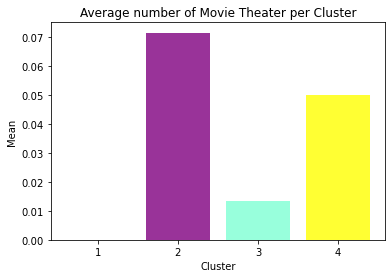

In [77]:
clusters_mean = [df_cluster1['Movie Theater'].mean(),df_cluster2['Movie Theater'].mean(),df_cluster3['Movie Theater'].mean(),
                 df_cluster4['Movie Theater'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'yellow'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Movie Theater per Cluster')

plt.show()

In [78]:
df_cluster4['Venue Category'].value_counts()

Fast Food Restaurant    2
Gym                     1
Liquor Store            1
Pet Store               1
Board Shop              1
Italian Restaurant      1
Movie Theater           1
Fish & Chips Shop       1
Steakhouse              1
Pizza Place             1
Pub                     1
Coffee Shop             1
Restaurant              1
Sushi Restaurant        1
Sandwich Place          1
Park                    1
Brewery                 1
Ice Cream Shop          1
Burrito Place           1
Name: Venue Category, dtype: int64